In [1]:
!pip install mlxtend 

#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from math import sqrt

In [2]:
#loading data
bf_data =  pd.read_csv(r'C:\Users\rinuj\black_friday.csv')
#bf_data = pd.read_csv('black_friday.csv')
bf_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
bf_data.shape

(550068, 12)

In [4]:
bf_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
#finding missing values
bf_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
#EDA using pandas profiling
# profile = ProfileReport(bf_data, title="Pandas Profiling Report")
# profile

In [7]:
#missing value handling
missing_col = ['Product_Category_2', 'Product_Category_3']
#Using mean to impute the missing values
for i in missing_col:
 bf_data.loc[bf_data.loc[:,i].isnull(),i]=bf_data.loc[:,i].mean()

bf_data.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [8]:
#dropping irrelevant columns
# bf_data.drop(['User_ID'], axis=1, inplace=True)
# bf_data.head()

#analyzing dtype of variables
print(bf_data.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


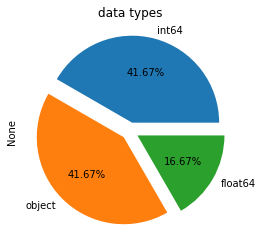

In [9]:
bf_data.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1], autopct='%1.2f%%')
plt.title('data types');

In [10]:
#finding categorical columns
categorical_columns = [i for i in bf_data.columns if bf_data.dtypes[i] == 'object']
categorical_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [11]:
#convert product category 2 and 3 to int
bf_data['Product_Category_2']=bf_data['Product_Category_2'].astype('int64')
bf_data['Product_Category_3']=bf_data['Product_Category_3'].astype('int64')

In [12]:
### Exploratory Data Analysis

#function to create count plot
def count_plot(dataframe, column_name, title =None, hue = None):
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    pass

In [13]:

#function to create bar plot
def bar_plot(data, title = None):
    data.plot(kind="bar", title = title)
    plt.show()
    pass

In [14]:
### Exploratory Data Analysis

#function to create count plot
def count_plot(dataframe, column_name, title =None, hue = None):
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    pass

In [15]:
#function to create bar plot
def bar_plot(data, title = None):
    data.plot(kind="bar", title = title)
    plt.show()
    pass

In [16]:
##### Finding most commonly purchased products

#top 10 poducts sold
bf_data["Product_ID"].value_counts(sort=True)[:10]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
Name: Product_ID, dtype: int64

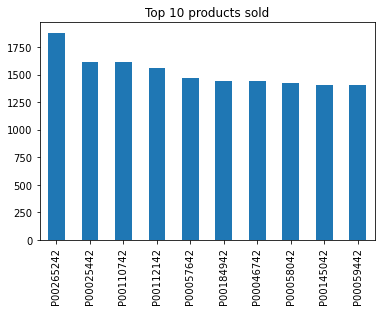

In [17]:
#plotting the top 10 products sold
bar_plot(bf_data["Product_ID"].value_counts(sort=True)[:10], title = "Top 10 products sold")

#The bar graph shows that the top 10 products are sold more than 1300 in quantity.

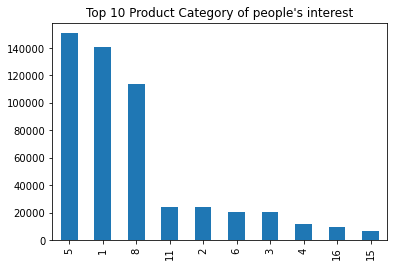

In [18]:
#### Finding which product category has been sold the most

#plotting the product category
bar_plot(bf_data["Product_Category_1"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Category of people's interest")

#The Product categories 5, 1 & 8 are sold most and it accounts to more than 100K.

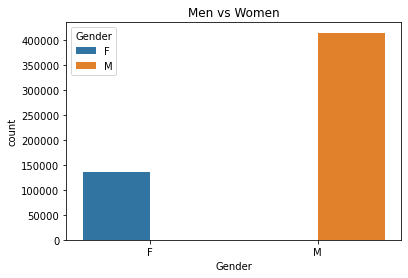

In [19]:
#### Who spend more,men or women?

count_plot(bf_data,"Gender","Men vs Women","Gender")

#Count plot depicts that men spend more on black friday sales when compared to women.

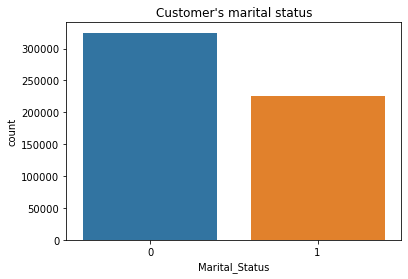

In [20]:
#### Who spend more, married or individuals?

count_plot(bf_data,"Marital_Status","Customer's marital status")

#Unmarried people with marital status 0 are likely to spend more than married people

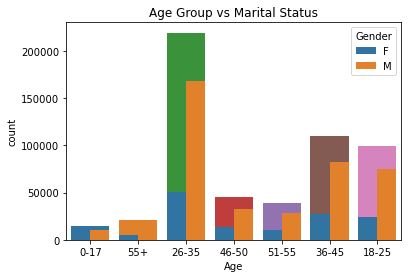

In [21]:
#### Finding age category of customers interesred in sales

bf_data.Age.value_counts()

count_plot(bf_data,"Age","Age Group of Customers")

#Majority of the customers belongs to the age category 26-35. We can also find the gender distribution in each age category by adding Gender as hue parameter.

count_plot(bf_data,"Age","Age Group vs Marital Status", "Gender")

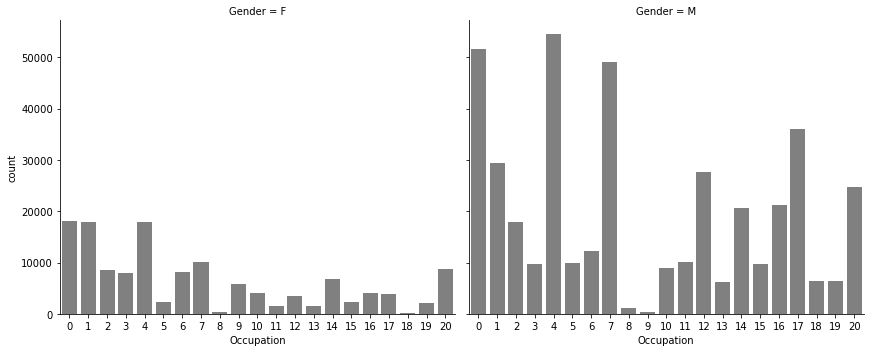

In [22]:
###### Customer distribution by occupation

sns.catplot(x="Occupation", col="Gender",
                data=bf_data, kind="count",
                height=5, aspect=1.2, color = 'Grey')

#Occupation level 4 tends to buy more products in both the gender

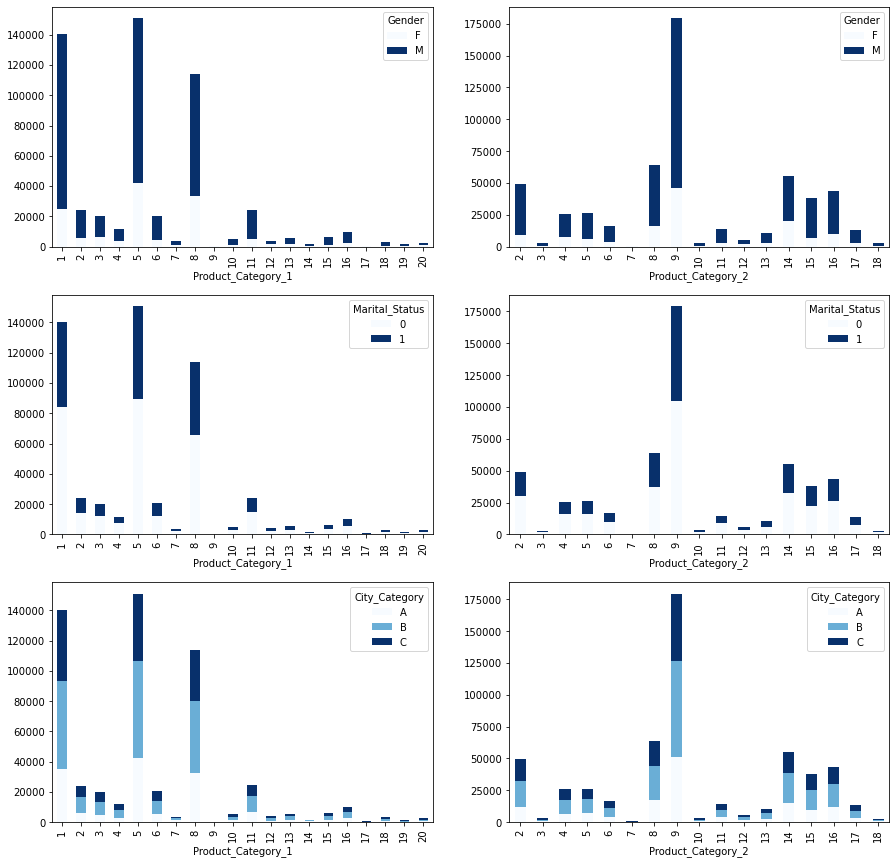

In [23]:
# Visual representation of what Product_Category_1, Product_Category_2 are prefered with respect to Gender, Marital status and city
fig,ax =plt.subplots(3,2,figsize=(15,15))
ax=ax.flatten()

pd.crosstab(bf_data['Product_Category_1'],bf_data['Gender']).plot(kind='bar',stacked=True,ax=ax[0], colormap='Blues')
pd.crosstab(bf_data['Product_Category_2'],bf_data['Gender']).plot(kind='bar',stacked=True,ax=ax[1], colormap='Blues')

pd.crosstab(bf_data['Product_Category_1'],bf_data['Marital_Status']).plot(kind='bar',stacked=True,ax=ax[2], colormap='Blues')
pd.crosstab(bf_data['Product_Category_2'],bf_data['Marital_Status']).plot(kind='bar',stacked=True,ax=ax[3], colormap='Blues')

pd.crosstab(bf_data['Product_Category_1'],bf_data['City_Category']).plot(kind='bar',stacked=True,ax=ax[4], colormap='Blues')
pd.crosstab(bf_data['Product_Category_2'],bf_data['City_Category']).plot(kind='bar',stacked=True,ax=ax[5], colormap='Blues')

plt.show()

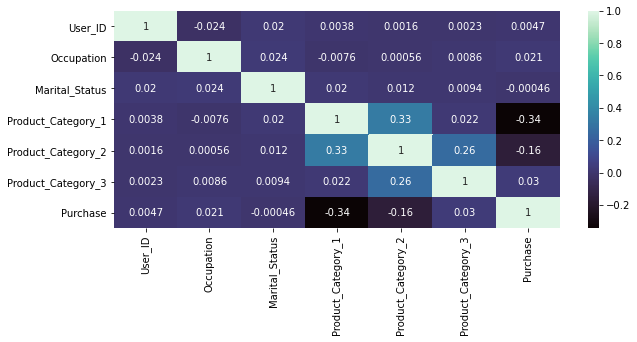

In [24]:
#### Correlation

plt.figure(figsize=(10,4))
sns.heatmap(bf_data.corr(),annot=True, cmap = 'mako')
plt.show()

#Product category 1 and 2 are highly correlated to purchase

In [25]:
##### Data Pre processing

#we use label encoding to convert age to ordinal variable
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
bf_data['Le_Age']=label_encoder.fit_transform(bf_data.Age)
# Shows which label is given to which Age group
compare=pd.DataFrame(columns=['Label','Age'])
compare['Label']=bf_data['Le_Age'].value_counts().index
compare['Age']=bf_data['Age'].value_counts().index
compare.sort_values(by='Label')

,Label,Age
6,0,0-17
2,1,18-25
0,2,26-35
1,3,36-45
3,4,46-50
4,5,51-55
5,6,55+


In [26]:
#dropping Age column
bf_data=bf_data.drop('Age',axis=1)
bf_data.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Le_Age
0,1000001,P00069042,F,10,A,2,0,3,9,12,8370,0
1,1000001,P00248942,F,10,A,2,0,1,6,14,15200,0
2,1000001,P00087842,F,10,A,2,0,12,9,12,1422,0
3,1000001,P00085442,F,10,A,2,0,12,14,12,1057,0
4,1000002,P00285442,M,16,C,4+,0,8,9,12,7969,6


In [27]:
#removing P from product ID
bf_data['Product_ID']= bf_data['Product_ID'].str.lstrip('P').astype(int)
bf_data.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Le_Age
0,1000001,69042,F,10,A,2,0,3,9,12,8370,0
1,1000001,248942,F,10,A,2,0,1,6,14,15200,0
2,1000001,87842,F,10,A,2,0,12,9,12,1422,0
3,1000001,85442,F,10,A,2,0,12,14,12,1057,0
4,1000002,285442,M,16,C,4+,0,8,9,12,7969,6


In [28]:
#converting gender column to 0 and 1 respectively
bf_data['Gender'] = bf_data['Gender'].map({'F':0, 'M':1}).astype(int)
bf_data.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Le_Age
0,1000001,69042,0,10,A,2,0,3,9,12,8370,0
1,1000001,248942,0,10,A,2,0,1,6,14,15200,0
2,1000001,87842,0,10,A,2,0,12,9,12,1422,0
3,1000001,85442,0,10,A,2,0,12,14,12,1057,0
4,1000002,285442,1,16,C,4+,0,8,9,12,7969,6


In [29]:
#converting City_category column to 0, 1 and 2 respectively
bf_data.City_Category.unique()

bf_data['City_Category'] = bf_data['City_Category'].map({'A':0, 'B':1, 'C':2}).astype(int)
bf_data.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Le_Age
0,1000001,69042,0,10,0,2,0,3,9,12,8370,0
1,1000001,248942,0,10,0,2,0,1,6,14,15200,0
2,1000001,87842,0,10,0,2,0,12,9,12,1422,0
3,1000001,85442,0,10,0,2,0,12,14,12,1057,0
4,1000002,285442,1,16,2,4+,0,8,9,12,7969,6


In [30]:
#converting Stay_In_Current_City_Years column to numerical
bf_data.Stay_In_Current_City_Years.unique()
bf_data['Stay_In_Current_City_Years'] = bf_data['Stay_In_Current_City_Years'].replace(['4+'], 4).astype(int)
bf_data.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Le_Age
0,1000001,69042,0,10,0,2,0,3,9,12,8370,0
1,1000001,248942,0,10,0,2,0,1,6,14,15200,0
2,1000001,87842,0,10,0,2,0,12,9,12,1422,0
3,1000001,85442,0,10,0,2,0,12,14,12,1057,0
4,1000002,285442,1,16,2,4,0,8,9,12,7969,6


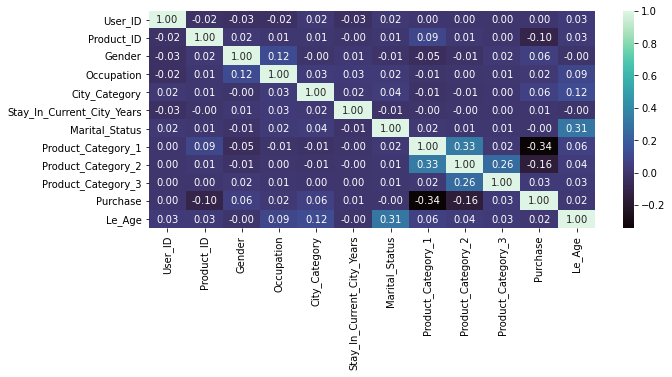

In [31]:
#plotting correlation matrix after pre processing
plt.figure(figsize=(10,4))
sns.heatmap(bf_data.corr(),annot=True, cmap = 'mako',fmt='.2f')
plt.show()

In [32]:
#The variables which show a significant correlation in the data are:

#Product_Category_1 and Purchase

#Product_Category_2 and Purchase
# #Create the basket 
# basket_data = bf_data.loc[:,['User_ID','Product_ID']]
# count = basket_data.groupby(['User_ID', 
# 'Product_ID']).size().reset_index(name='Count')
# basket = (count.groupby(['User_ID', 'Product_ID'])['Count']
#                   .sum().unstack().reset_index().fillna(0)
#                   .set_index('User_ID'))
# #For this dataset, all values are either 1 or 0. Thus, you can apply this "basket" straight to apriori algorithm.
# #Set support >= 0.05
# frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)
# #Filter lift >= 1
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# #Sort ascending by lift
# rules.sort_values(by = 'lift',ascending=False)

## Machine Learning Models

### Apriori Algorithm

#Create a list of list of different product IDs for feeding to TransactionEncoder

lst=[]
for item in bf_data['User_ID'].unique():
    lst2=list(set(bf_data[bf_data['User_ID']==item]['Product_ID']))
    if len(lst2)>0:
        lst.append(lst2)
print(lst[0:5])

[[51842, 183942, 375436, 142, 289942, 96542, 74142, 58142, 87842, 142242, 178342, 210342, 64042, 69042, 59442, 85942, 117942, 258742, 165942, 214842, 248442, 85442, 178242, 297042, 111842, 255842, 25442, 220642, 4842, 248942, 184942, 102642, 51442, 97142, 110842], [176642, 155142, 112142, 116242, 252442, 86042, 265242, 285742, 242742, 323642, 310842, 289342, 50242, 207942, 182342, 216142, 194642, 142942, 116842, 9342, 282242, 162442, 303242, 115342, 281742, 110742, 178342, 212142, 177842, 130742, 70342, 112842, 133842, 372445, 111842, 128742, 141542, 303342, 115442, 34042, 178942, 285442, 349442, 289042, 267542, 220442, 28442, 177442, 57642, 155442, 223542, 146742, 112442, 31042, 25942, 115542, 323942, 165742, 229742, 62842, 293242, 356742, 104842, 44442, 334242, 120242, 34742, 42942, 204742, 140742, 212942, 251342, 127442, 289242, 101342, 92142, 10742], [10242, 343042, 193542, 112142, 57742, 110742, 46742, 70042, 265242, 98342, 117542, 331942, 128042, 117042, 106042, 58042, 190142, 11

In [33]:
#The TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array.

te=TransactionEncoder()
te_df=te.fit(lst).transform(lst)
te_df

te_df= te_df.astype("int")

#converting Transaction Encoded data to pandas dataframe

df_x=pd.DataFrame(te_df,columns=te.columns_)
print(df_x.head())

   142     242     342     442     542     642     742     842     942     \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   1042    ...  370242  370293  370342  370442  370542  370642  370853  \
0       0  ...       0       0       0       0       0       0       0   
1       0  ...       0       0       0       0       0       0       0   
2       0  ...       0       0       0       0       0       0       0   
3       0  ...       0       0       0       0       0       0       0   
4       0  ...       0       0       0       0       0       0       0   

   371644  372445  375436  
0       0       0       1  
1       0       1       0  
2       

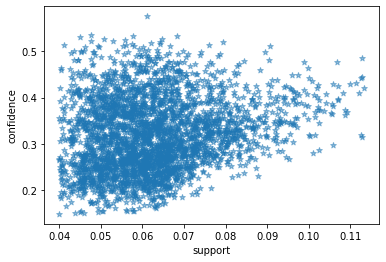

In [34]:
#Finding the frequent_items with apriori and minimum support value as 0.05

frequent_items=apriori(df_x,use_colnames=True,min_support=0.05)
frequent_items.head()
#frequent_items.describe()

# The association rules metrics that I are using are:
# 1) Support = how frequent an itemset emerges, measured by the number of transactions
# in which an itemset appears

# 2) Confidence (A -> B) = support (A -> B) / support (A), the probability of seeing the
# consequent in a transaction given that it also possesses an antecedent. The confidence
# equals to 1 for a rule A -> B means that the antecedent and consequent always occur
# together.

# 3) Lift (A -> B) = support (A -> B) / support (B), it measures the probability of occurrence
# betIen the antecedent and the consequent. If Lift is equal to 1, the probability of
# occurrence betIen the antecedent and consequent are independent. If Lift is greater than
# 1, the probability betIen the two events are dependent and if Lift is less than 1, the
# probability of two events are substitutes giving off negative effects on one another.

# 4) Leverage (A -> B = support (A -> B) - support (A) * support (B), the difference between
# the observed frequency of A and B appearing together and the frequency that would be
# expected if A and B Ire independent. If Leverage is 0, then A and B have independence.

# 5) Conviction (A -> B) = (1 - support (B)) / (1 - confidence (A -> B)), high conviction
# value means that the consequent is highly dependent on the antecedent. Otherwise, if
# the items are independent, then the conviction is 1.

rules=association_rules(frequent_items,metric='lift',min_threshold=1)
rules.antecedents=rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents=rules.consequents.apply(lambda x: next(iter(x)))
rules=rules.sort_values('lift',ascending=False)
rules.head()

#filtering rules based on conditions
rules[ (rules['confidence'] > 0.5) &
       (rules['lift'] > 1.2) ]

#plotting support vs confidence

support=rules['support'].to_numpy()
confidence=rules['confidence'].to_numpy()
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

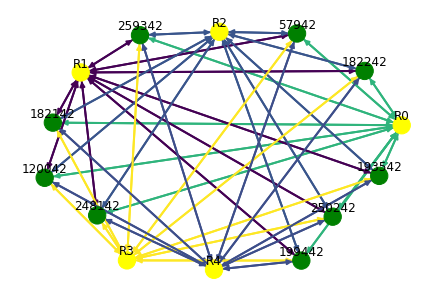

In [35]:
### Graph illustrating association rules

def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=14, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

#for easy interpretation of graph, taking a subset of rules.

rules1 = rules.head(10)

draw_graph (rules1, 5)

In [36]:
### Test Train data split

x=bf_data.drop('Purchase',axis=1)
y=bf_data.Purchase
print(x.shape)
print(y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=32)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(550068, 11)
(550068,)
(385047, 11)
(385047,)
(165021, 11)
(165021,)


In [37]:
### Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
### Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)

print("Model Coefficient (b0) = ", lr.intercept_)
print("Model Coefficients (bi) = ", lr.coef_)

lr_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

M_A_E = mean_absolute_error(y_test, lr_pred)
M_S_E = mean_squared_error(y_test, lr_pred)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_test, lr_pred)),'.2f'))
M_A_P_E = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100
M_P_E = np.mean((y_test - lr_pred) / y_test) * 100
r2 = r2_score(y_test, lr_pred)
lr_score = lr.score(x_train, y_train)

print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Linear Regressor score = ', lr_score)

Model Coefficient (b0) =  9267.12757143933
Model Coefficients (bi) =  [   22.66919605  -385.59748628   230.25728755    44.92667352
   275.5125967      8.5752704    -16.43724235 -1589.96102899
  -329.88159401   259.80946333   155.87341463]
Mean Squared Error =  21833555.12237604
Root Mean Squared Error =  4672.64
Mean Absolute Error =  3585.793112672932
Mean Absolute Percentage Error =  104.48180869533046
Mean Percentage Error =  -82.0371192444459
R2 Score =  0.13225572949762843
Linear Regressor score =  0.13601829276686428


In [39]:
### Decision tree Regressor

dtr= DecisionTreeRegressor(random_state=43)

dtr.fit(x_train,y_train)
d_predict= dtr.predict(x_test)

M_A_E = mean_absolute_error(y_test, d_predict)
M_S_E = mean_squared_error(y_test, d_predict)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_test, d_predict)),'.2f'))
M_A_P_E = np.mean(np.abs((y_test - d_predict) / y_test)) * 100
M_P_E = np.mean((y_test - d_predict) / y_test) * 100
r2 = r2_score(y_test, d_predict)
d_score = dtr.score(x_train, y_train)

print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Decision Tree Regressor score = ', d_score)

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rfc=RandomForestRegressor(n_estimators=100)
gbr=GradientBoostingRegressor()

rfc.fit(x_train, y_train)
r_predict= rfc.predict(x_test)

gbr.fit(x_train,y_train)
g_predict= gbr.predict(x_test)

M_A_E = mean_absolute_error(y_test, r_predict)
M_S_E = mean_squared_error(y_test, r_predict)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_test, r_predict)),'.2f'))
M_A_P_E = np.mean(np.abs((y_test - r_predict) / y_test)) * 100
M_P_E = np.mean((y_test - r_predict) / y_test) * 100
r2 = r2_score(y_test, r_predict)
rfc_score = rfc.score(x_train, y_train)

print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Random Forest Regressor score = ', rfc_score)

M_A_E = mean_absolute_error(y_test, g_predict)
M_S_E = mean_squared_error(y_test, g_predict)
R_M_S_E = float(format(np.sqrt(mean_squared_error(y_test, g_predict)),'.2f'))
M_A_P_E = np.mean(np.abs((y_test - g_predict) / y_test)) * 100
M_P_E = np.mean((y_test - g_predict) / y_test) * 100
r2 = r2_score(y_test, g_predict)
gbr_score = gbr.score(x_train, y_train)

print('Mean Squared Error = ',M_S_E)
print('Root Mean Squared Error = ',R_M_S_E)
print('Mean Absolute Error = ',M_A_E)
print('Mean Absolute Percentage Error = ',M_A_P_E)
print('Mean Percentage Error = ', M_P_E)
print('R2 Score = ', r2)
print('Gradiant Regressor score = ', rfc_score)

Mean Squared Error =  14272063.76155156
Root Mean Squared Error =  3777.84
Mean Absolute Error =  2648.505408402567
Mean Absolute Percentage Error =  37.54725821595969
Mean Percentage Error =  -11.931785602064897
R2 Score =  0.43277668304972106
Decision Tree Regressor score =  1.0
Mean Squared Error =  7496028.737547494
Root Mean Squared Error =  2737.89
Mean Absolute Error =  2016.8997941474115
Mean Absolute Percentage Error =  30.090338837515173
Mean Percentage Error =  -11.953363789868638
R2 Score =  0.7020807673294712
Random Forest Regressor score =  0.9584280887649734
Mean Squared Error =  8566584.107351104
Root Mean Squared Error =  2926.87
Mean Absolute Error =  2222.760330879881
Mean Absolute Percentage Error =  40.64600418139932
Mean Percentage Error =  -23.143114072185437
R2 Score =  0.6595330336600891
Gradiant Regressor score =  0.9584280887649734
